# 实验二 使用决策树和随机森林对数据分类

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split

## 读入数据

In [2]:
data = pd.read_csv("data/income_classification.csv")

In [129]:
type(data)

pandas.core.frame.DataFrame

### 显示数据维度

In [130]:
data.shape

(32561, 15)

### 显示前5行数据

In [131]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 查看个变量样本数

In [132]:
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

### 部分变量描述统计

In [133]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 按职业分组、计数并排序

In [134]:
data.groupby('occupation').size().sort_values(ascending=False)

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
dtype: int64

### 按国籍分组、计数并排序

In [135]:
data.groupby('native-country').size().sort_values(ascending=False)

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

### 绘制教育年限直方图

array([[<AxesSubplot:title={'center':'education-num'}>]], dtype=object)

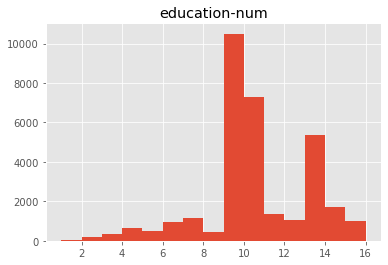

In [3]:
plt.style.use('ggplot')
data.hist(column='education-num', bins=15);
plt.show()

### 以年龄为横坐标、周平均工作时长为纵坐标绘制散点图

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

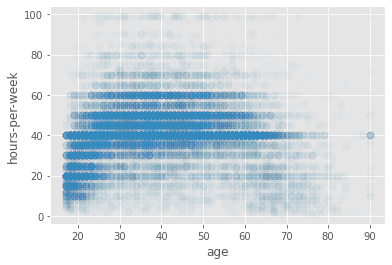

In [4]:
data.plot(x='age', y='hours-per-week', kind='scatter',alpha=0.02, s=50)

### 将样本数据按照收入水平分组，并计算各组样本数

In [140]:
data.groupby('income')['income'].count()

income
<=50K    24720
>50K      7841
Name: income, dtype: int64

### data[‘income’] == ’ >50K’中是取值为TRUE（1）或FALSE（0）的布尔值,此处计算其均值，即收入水平大于50K的人数占比

In [141]:
np.mean(data['income'] == '>50K')

0.2408095574460244

### pandas中Series.unique()返回序列（series）中唯一值的数组（array），目的是检查是否存在缺失值或异常值：

In [142]:
data['income'].unique()
data = data.dropna() # pandas.DataFrame.dropna 可以删除数据框中的缺失值
data['income'].unique() # 如果变量income中含有缺失值，可在此步验证是否已经将缺失值删除

array(['<=50K', '>50K'], dtype=object)

array(['<=50K', '>50K'], dtype=object)

### 将收入水平不超过50K的数据保存到数据框low_income，高于50K的数据保存到数据框high_income:

In [6]:
low_income = data[data['income'] == '<=50K']
high_income = data[data['income'] == '>50K']

### 绘制、对比不同收入水平的年龄分布情况

(array([   0.,  945., 2932., 3142., 3576., 2625., 2284., 2062., 1754.,
        1677., 1038.,  904.,  721.,  457.,  325.,  142.,   68.,   28.,
          40.]),
 array([10.        , 14.21052632, 18.42105263, 22.63157895, 26.84210526,
        31.05263158, 35.26315789, 39.47368421, 43.68421053, 47.89473684,
        52.10526316, 56.31578947, 60.52631579, 64.73684211, 68.94736842,
        73.15789474, 77.36842105, 81.57894737, 85.78947368, 90.        ]),
 <BarContainer object of 19 artists>)

(array([   0.,    0.,   18.,  159.,  688.,  840., 1115., 1090., 1149.,
        1118.,  626.,  487.,  275.,  142.,   75.,   29.,   19.,    3.,
           8.]),
 array([10.        , 14.21052632, 18.42105263, 22.63157895, 26.84210526,
        31.05263158, 35.26315789, 39.47368421, 43.68421053, 47.89473684,
        52.10526316, 56.31578947, 60.52631579, 64.73684211, 68.94736842,
        73.15789474, 77.36842105, 81.57894737, 85.78947368, 90.        ]),
 <BarContainer object of 19 artists>)

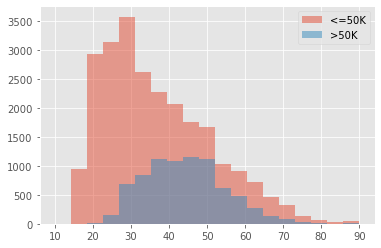

In [7]:
bins = np.linspace(10, 90, 20)
plt.hist(low_income['age'].values, bins=bins, alpha=0.5, label='<=50K')
plt.hist(high_income['age'].values, bins=bins, alpha=0.5, label='>50K')
plt.legend(loc='best'); # 添加变量标注说明，参数为位置设置
plt.show()

## 对连续变量年龄进行离散化，并显示前5行数据离散化后的结果

In [146]:
age_bins = [20,30,40,50,60,70]

In [148]:
data['age'] = pd.cut(data['age'],6,labels=age_bins)

In [149]:
data['age']

0        30
1        40
2        30
3        40
4        20
         ..
32556    20
32557    30
32558    50
32559    20
32560    40
Name: age, Length: 32561, dtype: category
Categories (6, int64): [20 < 30 < 40 < 50 < 60 < 70]

In [150]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,30,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,40,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,30,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,40,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,20,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 对属性是字符串的任意特征进行数字化处理

In [11]:
encoder = LabelEncoder()

In [12]:
str_col = data.select_dtypes(include = object,exclude = int)

In [13]:
for i in str_col:
    data[i] = encoder.fit_transform(data[i])

In [14]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


## 拆分训练数据和测试数据比例7:3

In [ ]:
# 将特征划分到 X 中，标签划分到 Y 中

In [15]:
x = data.iloc[:,:-1]

In [16]:
y = data.iloc[:,-1]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

## CART决策树分类

In [18]:
clf_cart = tree.DecisionTreeClassifier(criterion = 'entropy') # CART算法，使用entropy作为标准；默认是是用gini作为标准
clf_cart.fit(x_train, y_train)
accuracy_cart = clf_cart.score(x_test, y_test)
print('CART树分类准确率：',accuracy_cart)

DecisionTreeClassifier(criterion='entropy')

CART树分类准确率： 0.8116490940730884


## 随机森林分类

In [159]:
clf_random = RandomForestClassifier()
clf_random.fit(x_train, y_train)
accuracy_random = clf_random.score(x_test, y_test)
print('随机森林分类准确率：', accuracy_random)

RandomForestClassifier()

随机森林分类准确率： 0.8502405568635479
